In [114]:
import numpy as np
import quaternion
import math
from numpy import linalg as LA

deg = 180/math.pi

x0 = [1, 0, 0]
y0 = [0, 1, 0]
z0 = [0, 0, 1]

x0_quat = quaternion.quaternion(0,1,0,0)
y0_quat = quaternion.quaternion(0,0,1,0)
z0_quat = quaternion.quaternion(0,0,0,1)

beta = 0*math.pi/180


### GOAL VECTOR ###
goal = [1.0,1.0,0.0]


goal_norm = []
for i in goal:
    goal_norm.append(i/LA.norm(goal)) #Normalized vector of goal
    
print("goal : ",goal_norm)

### VECTOR AND ANGLE OF ROTATION ###
vector= np.cross(z0,goal_norm)

vector_norm = [] #Normalized vector of rotation
for i in vector:
    vector_norm.append(i/LA.norm(vector))


v = quaternion.quaternion(0.0,vector_norm[0],vector_norm[1],vector_norm[2]) #Vector of rotation as a quaternion
print("v : ",v)
alpha = math.acos(np.vdot(z0,goal_norm)) #Angle of rotation
print("alpha : ",alpha*deg)


### QUATERNION OF ROTATION ###
w1 = math.cos(alpha/2.0)
x1 = math.sin(alpha/2.0)*v.x
y1 = math.sin(alpha/2.0)*v.y
z1 = math.sin(alpha/2.0)*v.z

q1 = quaternion.quaternion(w1,x1,y1,z1) #1st rotation quaternion
q1_inv = q1.inverse()

z_prime = q1*z0_quat*q1_inv

print("z after 1st rotation : ",z_prime)

w2 = math.cos(beta/2.0)
x2 = math.sin(beta/2.0)*z_prime.x
y2 = math.sin(beta/2.0)*z_prime.y
z2 = math.sin(beta/2.0)*z_prime.z

q2 = quaternion.quaternion(w2,x2,y2,z2) #Quaternion of the rotation on new z axis
q2_inv = q2.inverse()

Z = q2*z_prime*q2_inv #Final Z
X = q2*(q1*x0_quat*q1_inv)*q2_inv #Final X
Y = q2*(q1*y0_quat*q1_inv)*q2_inv #Final Y

print("Final X : ",X)
print("Final Y : ",Y)
print("Final Z : ",Z)

goal :  [0.7071067811865475, 0.7071067811865475, 0.0]
v :  quaternion(0, -0.707106781186548, 0.707106781186548, 0)
alpha :  90.0
z after 1st rotation :  quaternion(0, 0.707106781186548, 0.707106781186548, 1.11022302462516e-16)
Final X :  quaternion(0, 0.5, -0.5, -0.707106781186548)
Final Y :  quaternion(0, -0.5, 0.5, -0.707106781186548)
Final Z :  quaternion(0, 0.707106781186548, 0.707106781186548, 1.11022302462516e-16)


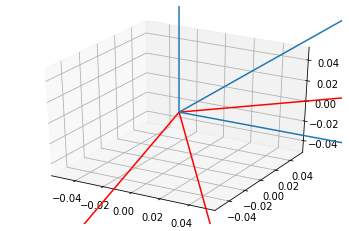

In [116]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

p0 = [X.x, X.y, X.z]
p1 = [Y.x, Y.y, Y.z]
p2 = [Z.x, Z.y, Z.z]

origin = [0,0,0]
X_, Y_, Z_ = zip(origin,origin,origin)
X0_,Y0_,Z0_ = zip(origin,origin,origin)
U, V, W = zip(p0,p1,p2)
U0,V0,W0 = zip(x0,y0,z0)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.quiver(X0_,Y0_,Z0_,U0,V0,W0,arrow_length_ratio=0.01)
ax.quiver(X_,Y_,Z_,U,V,W,arrow_length_ratio=0.01,color='r')
plt.show()

In [103]:
angle = math.acos(np.vdot(p0,p2))
print(angle*deg)

90.0
